## Method 2:- Random Sample Imputation for replacing NAN values

Aim:- Random Sample Imputation consist of taking random observation from the dataset and we use this observation to replace the nan values.

When Should it be used?
Ans:- It assumes that data are missing completely at random (MCAR) so we can use this when our data is MCAR

In [1]:
import pandas as pd
df = pd.read_csv("C:/Users/AYAAN/Data Sets/titanic.csv",usecols=["Survived", "Age", "Fare"]) #we are taking specific columns for practice

In [2]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [3]:
df.isnull().mean() #checking the nan values percentage we have age column which is having 19% nan values

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

#### We will replace the NAN Values with random samples
1. we will create a function 
2. compute random value from the column which you need eg: "Age"

In [4]:
#SYNTAX:-

def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median) #here you are getting all the median values in Age_median variable
    df[variable+"_random"]=df[variable] #Coping valus of Age_median to Age_random variable

#It will have the random samples to fill the NAN**
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0) #this will pickup some random values from the age column for NAN values

#pandas need to have same index in order to merge dataset
    random_sample.index=df[df[variable].isnull()].index #here we are seeing which of the indexes have NAN values
    df.loc[df[variable].isnull(),variable+'_random']=random_sample  #here we are replacing index NAN values with random sample value

In [5]:
#### Computing Random Value from "Age" Column
df["Age"].dropna().sample()  #This dropna() will remove all the nan values from age and sample() will give you random values from the "Age" column 
#dropna() is necessary because if we dont give dropna() then the sample() will give randomly nan values also
#Note: Random value will always change everytime you executes

805    31.0
Name: Age, dtype: float64

In [6]:
df["Age"].isnull().sum() #Number of NAN values inside the Age Column

177

In [7]:
df["Age"].dropna().sample(df["Age"].isnull().sum(),random_state=0)
#If you dont write random_state = 0 then it will always chage the values whenever you execute
#Note: we have written df["Age"].isnull().sum() inside the sample because we want to replace all 177 nan values with random sample and we get the output 177 for df["Age"].isnull().sum() we know that in the above cell 

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [8]:
median=df.Age.median()

In [9]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [10]:
median

28.0

In [11]:
impute_nan(df,"Age",median)

In [12]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

#### Now we will compare both Methods and check which method was good

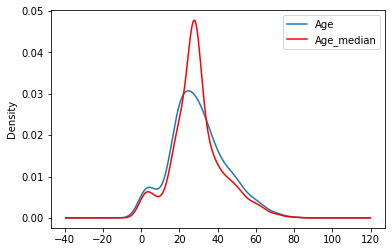

In [14]:
#Age vs Age_median which we done with Median Imputation in Feature Engineering 1st Part
# Method 1: Median Imputation
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

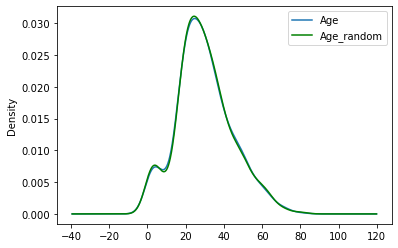

In [15]:
#Method 2: RAndom Sample Imputation 
#Age vs Age_random Plot
fig = plt.figure()
ax = fig.add_subplot(111) #subplot is used when we want to make more than 1 plot and for 1 plot you have to define 111
df['Age'].plot(kind='kde', ax=ax)
df.Age_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best') #loc=best is basically location of the legends


#NOTE: Here you can see that blue line is for "Age" and green is for "Age_random" 
#here we can se that random sample imputation is pretty much good the distortion is very less then the actual age column

#### Advantages
1. Easy To implement
2. There is less distortion in variance
#### Disadvantage
1. In Every situation random sample imputation will not work

## Method 3:- Capturing NAN Values with a new feature/variable

#### When to use ?
Ans:- It works well wehen data is missing not at random (MNAR)

In [16]:
df = pd.read_csv("C:/Users/AYAAN/Data Sets/titanic.csv", usecols=["Survived", "Age", "Fare"])

In [17]:
df.head(20)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
5,0,NaN,8.4583
6,0,54.0,51.8625
7,0,2.0,21.0750
8,1,27.0,11.1333
9,1,14.0,30.0708


In [18]:
import numpy as np

In [19]:
df["Age_NAN"] = np.where(df["Age"].isnull(),1,0) #here is isnull(),1,0 means 1 is like if any value is null/NAN/Missing make it as 1 or if not null/NAN/Missing then make it as 0 and this all will get stored in Age_NAN

In [20]:
df.head(20) #Note: Here in Age_NAN 0 means Not NAN Values(missing value) and 1 means NAN values(missing value)

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,NaN,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


In [21]:
#Noe I will Replace the NAN Values from "Age" by Mean or Median because I have to use this dataset for creating a model and because of this new feature("Age_NAN") 
#wherever the values are missing it is noted as 1 that basically shows the importance of missing values and probably you can use that for model creation.

In [22]:
mean = df['Age'].mean()
print(mean)
median = df["Age"].median()
print(median)
# I have computed both mean and median for Age column and putted it in to mean and median variable

29.69911764705882
28.0


In [23]:
#here I am filling NAN values of Age with median you can use mean also because both are used for central tendancy and have similar values
df['Age'] = df['Age'].fillna(median)

In [24]:
df.head(20)

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


### Advantages 
1. Easy to implement 
2. Capture the importance of missing values

### Disadvantage 
1. It basically create new feature/variable which can lead to (Curse of dimensionality) but if the data set is not having that much of feature/variable then you can use it


## Method 4:- End of distribution Imputation

##### When to use?
##### Ans:- For data missing completley at random (MCAR)

In [90]:
df = pd.read_csv("C:/Users/AYAAN/Data Sets/titanic.csv",usecols=["Survived", "Age", "Fare"])
df.head(20)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
5,0,NaN,8.4583
6,0,54.0,51.8625
7,0,2.0,21.0750
8,1,27.0,11.1333
9,1,14.0,30.0708


In [91]:
#Here we taking values after 3rd standard deviation means that we are taking value some where away from 3rd standard deviation

In [92]:
mean #We se that mean is 29.36158249158249 in histogram also you can see the middle value is 29.36158249158249 which is the central tendenccy of the data set

29.69911764705882

<AxesSubplot:>

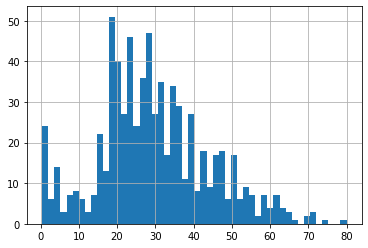

In [93]:
df["Age"].hist(bins=50)

C:\Users\AYAAN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


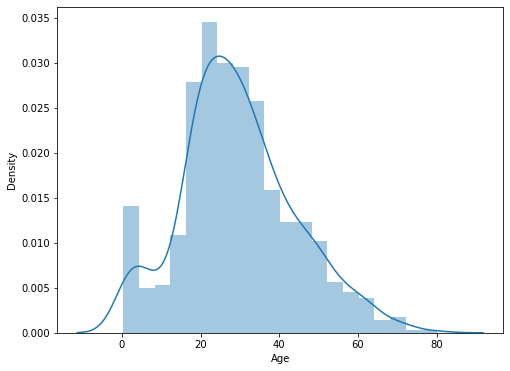

In [94]:
#NOTE: Here I have made distplot(distribution plot) in order to show the peak of curved is our mean and we will going to take value after 3rd standard deviation
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,6))
sns.distplot(df['Age'])
plt.show()

In [95]:
#Now from this Distribution I will try to take value from end of the distibution to replace NAN value but the question is which value should I take so we have the formula for it.
#We know that standard deviation comes after the mean 
#1st we will calculate Third standard deviation.
#I have done this to understand for my self I have calculate individually you can also perfom the next down cell directly
print(df["Age"].std()) #First Standard Deciation 
print(df["Age"].std()*3) #Third Standard Deviation after mean 



14.526497332334044
43.57949199700213


In [96]:
#Now we will add mean and Third Standard Deciation to get the values after 3rd Standard Deviation
extreme_value = df["Age"].mean() + df["Age"].std()*3 
print(extreme_value)

#Here you can see that 73.27860964406095 is the value you can take to replace the NAN

73.27860964406095


C:\Users\AYAAN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

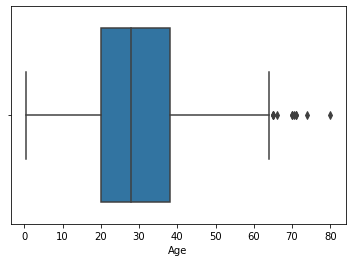

In [97]:
#Checking the Outliers
import seaborn as sns
sns.boxplot("Age", data = df)


#Boxplot basically shows 25 Percentile which is from 0 to 18
# 50 Percentile which is from 18 to 28
# 75 Percentile which is from 28 to 38
# 100 Percentile which is from 38 to 65
# And after 100 Percentile all are Outliers

In [98]:
def impute_nan(dataframe, variable, median, extreme_value):
    df[variable+"_end_distribution"] = df[variable].fillna(extreme_values) #df[variable+"_end_distribution"] this is basically create a varibale Age_end_distribution which will have the values of Age Column in which nan values were replaced by extreme_value 73.27861
    df[variable].fillna(median, inplace = True) #Here we are replacing NAN values of "Age" column with median
    #inplace = True mean the changes will be in the original dataset
    

In [99]:
MEDIAN = df["Age"].median()
print(MEDIAN)

28.0


In [100]:
extreme_value = df["Age"].mean() + df["Age"].std()*3 
print(extreme_value)

73.27860964406095


#### Now we will pass dataframe which is df and variable which is "Age" and Median which we have computed in MEDIAN variable and extreme value in the extreme_value variable 

In [101]:
impute_nan(df, "Age", MEDIAN, extreme_value) #NOTE: df in the above function will be aour data set variable in the above function is the Column Age that we have passed here similarly median and extreme values we have computed above 

In [102]:
df.head(50)

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.00000
1,1,38.0,71.2833,38.00000
2,1,26.0,7.9250,26.00000
3,1,35.0,53.1000,35.00000
4,0,35.0,8.0500,35.00000
5,0,28.0,8.4583,73.27861
6,0,54.0,51.8625,54.00000
7,0,2.0,21.0750,2.00000
8,1,27.0,11.1333,27.00000
9,1,14.0,30.0708,14.00000


<AxesSubplot:>

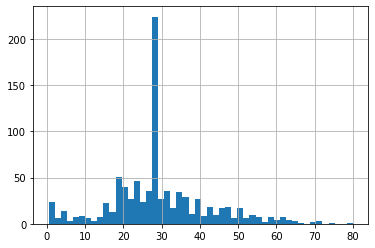

In [103]:
df["Age"].hist(bins=50)
#Since we replaced NAN values with median the peak is in the middle thats why it is now become normal distribution

<AxesSubplot:>

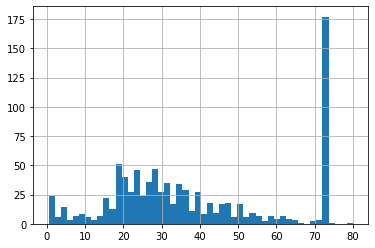

In [104]:
df["Age_end_distribution"].hist(bins=50)

C:\Users\AYAAN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_end_distribution'>

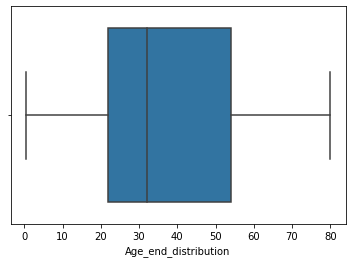

In [106]:
sns.boxplot("Age_end_distribution", data=df)

#There is no outliers now

#### Video Link: https://youtu.be/RZRoFU_abqU